##3. (5 points) Perceptron ---Use SONAR dataset for this question. Perform a train:test split of 8:2 and implement classification of the same using single layer perceptrons (3 points). Report the cost or error produced in each epoch through a plot (2 points).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sonar_data.csv to sonar_data.csv


In [152]:
#import important libraries 

import numpy as np
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

In [74]:
#Reading the input file   

df= pd.read_csv("sonar_data.csv")
print(df) #R and M in dataset represent 'Rock' and 'Mine' respectively.

         V0      V1      V2      V3      V4  ...     V56     V57     V58     V59  V60
0    0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032    R
1    0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044    R
2    0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078    R
3    0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117    R
4    0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094    R
..      ...     ...     ...     ...     ...  ...     ...     ...     ...     ...  ...
203  0.0187  0.0346  0.0168  0.0177  0.0393  ...  0.0065  0.0115  0.0193  0.0157    M
204  0.0323  0.0101  0.0298  0.0564  0.0760  ...  0.0034  0.0032  0.0062  0.0067    M
205  0.0522  0.0437  0.0180  0.0292  0.0351  ...  0.0140  0.0138  0.0077  0.0031    M
206  0.0303  0.0353  0.0490  0.0608  0.0167  ...  0.0034  0.0079  0.0036  0.0048    M
207  0.0260  0.0363  0.0136  0.0272  0.0214  ...  0.00

In [75]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      208 non-null    float64
 1   V1      208 non-null    float64
 2   V2      208 non-null    float64
 3   V3      208 non-null    float64
 4   V4      208 non-null    float64
 5   V5      208 non-null    float64
 6   V6      208 non-null    float64
 7   V7      208 non-null    float64
 8   V8      208 non-null    float64
 9   V9      208 non-null    float64
 10  V10     208 non-null    float64
 11  V11     208 non-null    float64
 12  V12     208 non-null    float64
 13  V13     208 non-null    float64
 14  V14     208 non-null    float64
 15  V15     208 non-null    float64
 16  V16     208 non-null    float64
 17  V17     208 non-null    float64
 18  V18     208 non-null    float64
 19  V19     208 non-null    float64
 20  V20     208 non-null    float64
 21  V21     208 non-null    float64
 22  V2

In [76]:
df.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,

In [77]:
#shows missing values
df.isna().sum()

V0     0
V1     0
V2     0
V3     0
V4     0
      ..
V56    0
V57    0
V58    0
V59    0
V60    0
Length: 61, dtype: int64

In [78]:
df.shape

(208, 61)

In [79]:
#Dependent variable
df['V60'].value_counts()    #R and M in dataset represent 'Rock' & 'Mine' respectively.

M    111
R     97
Name: V60, dtype: int64

In [91]:
#Feature variables are from columns V0 to V59
print("Features")
X = df[df.columns[0:60]].values #to list
print(X)

#labelled variable is in the column V60
print("\nLabel")
y = df[df.columns[60]]
print(y) 

Features
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]

Label
0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: V60, Length: 208, dtype: object


In [94]:
# Encoding of categorical variable i.e. V60

encode = LabelEncoder() #creating object
encode.fit(y)
y = encoder.transform(y)

print(y) # print list for V60 column

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [95]:
# convert categorical into numeric 

# label encoding by function definiton
def one_hot_encode(labels):
    labels1 = len(labels)
    unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((labels1,unique_labels))
    one_hot_encode[np.arange(labels1), labels] = 1
    return one_hot_encode

Y = one_hot_encode(y) #function call
print(Y) #print array

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [98]:
#spliting the features in X and labels/targets encoded in Y ----->> into train and test data

#shuffling & splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle=True, test_size=0.20, random_state=42)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (166, 60) (166, 2)
Test set: (42, 60) (42, 2)


In [125]:
#TENSORFLOW

#starting the tensorflow session
session = tf.compat.v1.Session()

#initialize the variables for tensorflow
learn_rate = 0.1     #rate of learning the model
epochs = 1000        # the no. of repeats/interations
cost_history = np.empty(shape=[1], dtype=float)  #array to store cost for each epoch

num_dim = X.shape[1]   #stores number of features for dataset X
num_class = 2   # classes =2 , since there are two classes ---->>> MINES and ROCKS

print("Number of Features =", num_dim)
print("Number of Classes =", num_class)

Number of Features = 60
Number of Classes = 2


In [126]:
#defining parameters for the preceptron linear model

#tensor variables
x = tf.placeholder(tf.float32, [None,num_dim]) #to store the feature values
W = tf.Variable(tf.zeros([num_dim,num_class])) #to store the weight values
b = tf.Variable(tf.zeros([num_class])) #to store the bias values

#initialize other tensor variables
init_var = tf.global_variables_initializer()

In [127]:
#placeholder variable
y_ = tf.placeholder(tf.float32, [None,n_class])  
y = tf.nn.softmax(tf.matmul(x, W) + b)

#cost function
cost_funct = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)) , reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost_funct)   #cost function is always minimized to reduce the error
 
#initialize the tensorflow session
session = tf.Session()
session.run(init_var)

In [129]:
#calculate the cost for each epoch
for i in range(epochs):
    session.run(training_step, feed_dict = {x : X_train, y_ : Y_train})
    cost = session.run(cost_funct,feed_dict={x: X_train, y_ : Y_train})
    cost_history = np.append(cost_history, cost)

    #to print cost of each epoch
    print('Epoch no.: ', i,  ' ----->> ', 'cost= ', cost)    

Epoch no.:  0  ----->>  cost=  0.5512829
Epoch no.:  1  ----->>  cost=  0.5508504
Epoch no.:  2  ----->>  cost=  0.5504205
Epoch no.:  3  ----->>  cost=  0.54999304
Epoch no.:  4  ----->>  cost=  0.5495681
Epoch no.:  5  ----->>  cost=  0.54914564
Epoch no.:  6  ----->>  cost=  0.54872566
Epoch no.:  7  ----->>  cost=  0.548308
Epoch no.:  8  ----->>  cost=  0.54789287
Epoch no.:  9  ----->>  cost=  0.54748005
Epoch no.:  10  ----->>  cost=  0.54706967
Epoch no.:  11  ----->>  cost=  0.5466616
Epoch no.:  12  ----->>  cost=  0.5462559
Epoch no.:  13  ----->>  cost=  0.5458524
Epoch no.:  14  ----->>  cost=  0.5454512
Epoch no.:  15  ----->>  cost=  0.54505235
Epoch no.:  16  ----->>  cost=  0.5446557
Epoch no.:  17  ----->>  cost=  0.5442613
Epoch no.:  18  ----->>  cost=  0.5438691
Epoch no.:  19  ----->>  cost=  0.543479
Epoch no.:  20  ----->>  cost=  0.5430912
Epoch no.:  21  ----->>  cost=  0.5427054
Epoch no.:  22  ----->>  cost=  0.5423218
Epoch no.:  23  ----->>  cost=  0.54194

171
MSE values: [0.24616215080523762, 0.24359927964093236, 0.24168837892733022, 0.24012779458470904, 0.23876399810831433, 0.23751606527976693, 0.23634034255379469, 0.23521288044846944, 0.23412033598399745, 0.2330551659903668, 0.23201299160116373, 0.23099118939009236, 0.2299881057275494, 0.22900262536221597, 0.22803394792061926, 0.22708143549292012, 0.22614455773549422, 0.22522284713582236, 0.22431587097638472, 0.2234232324897245, 0.2225445425007536, 0.22167944883365975, 0.2208275868612408, 0.2199886317453984, 0.21916224096751213, 0.21834811165453863, 0.2175459376502294, 0.21675540783542968, 0.2159762495284492, 0.21520818174933948, 0.21445093816957822, 0.21370425557604872, 0.21296788948364775, 0.21224158304501564, 0.21152510935265498, 0.2108182457468403, 0.21012075838833705, 0.20943244509849845, 0.20875308784040061, 0.2080824959146072, 0.20742047067631178, 0.20676681521974696, 0.2061213616228589, 0.2054839202918235, 0.20485432596547848, 0.2042324110100852, 0.20361800957619508, 0.2030109

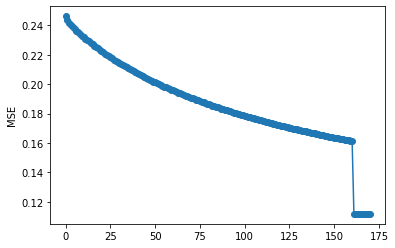

In [150]:
#Run the perceptron model on the test dataset
Y_pred = session.run(y, feed_dict={x: X_test})

#calculate Mean Sqaure Error
mse = tf.reduce_mean(tf.square(Y_pred - Y_test))
mse_history.append(session.run(mse))

#print the mean square error
print(len(mse_history))
print("MSE values:", mse_history, "\n")

#MSE plot
plt.plot(mse_history, 'o-')
plt.ylabel("MSE")
plt.show()

In [148]:
#Accuracy of the model 
true_prediction = tf.equal(tf.argmax(Y_pred,1), tf.argmax(Y_test,1))
accuracy = tf.reduce_mean(tf.cast(true_prediction, tf.float32))

print("Accuracy = ", session.run(accuracy))

Accuracy =  0.85714287


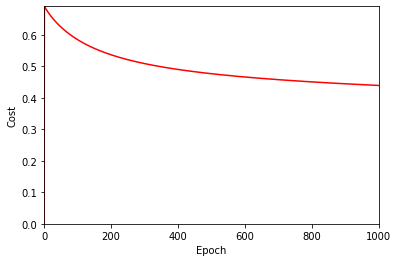

In [149]:
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.axis([0, epochs, 0, np.max(cost_history)])
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()